#### ex 2:
##### ( 1 ) Solve the linear equations $Ax = b \, (A \in \mathbb{R}^{N \times N}, b \in \mathbb{R}^N)$ by Fast Fourier transform (FFT) with the circulant matrix defined as
$$
A = \begin{equation*}
\left( \begin{array}{cccc}
      3   &    -1          &        \cdots        &   -1   \\
      -1  &     3          &                      &      \vdots    \\
      \vdots     & \ddots                     & \ddots               &      \vdots   \\
      -1    &      \cdots                & -1 & 3
\end{array} \right).
\end{equation*}
$$
##### and
$$
b = [1, 1, \cdots, 1]^T
$$

##### Solution.
##### A straightforward computation shows that the eigenvectors and corresponding eigenvalues of the circulant matrix $A$ are 
$$
\lambda_k = 4 \sin^2 \left ( \frac{k \pi}{N} \right ) + 1, \; v^j_k = e^{-2 \pi \mathrm{i} \frac{k}{N} j}, \; k,j = 0, 1, \dots, N-1.
$$
##### Consider the Fourier matrix and discrete Fourier transform (DFT)
$$
({\bf F})_{jk}= \frac{1}{\sqrt{N}} e^{-2\pi i (j-1)(k-1)/N}, \; j,k = 1,\cdots,N,
$$
$$
\mathcal{F}[u] = {\bf F} u, \; u \in \mathbb{R}^N.
$$  
##### Furthermore, one have 
$$
{\bf F} = {\bf F}^T, {\bf F} {\bf F}^H = {\bf F}^H {\bf F} = I.
$$
##### and
$$
{\bf F} A {\bf F}^H = \Lambda := \text{diag}(\lambda_0, \cdots, \lambda_{N-1}).
$$
##### Thus, 
$$
{\bf F} b = {\bf F} A x = \Lambda {\bf F} x
$$
#### Procedure:
##### - Step 1: solve $y = \Lambda^{-1} {\bf F} b = \Lambda^{-1} \mathcal{F}[b]$
##### - Step 2: solve $x = F^H y = \mathcal{F}[y]$ 

##### remark: help(fft.fft)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import scipy 
from scipy import fft

import os
from make_dir import mkdir
mkdir(file_dir="./figure")


file has already exists!


In [2]:
# num of points
N = 2**10

# defination of A and b
A = np.diag(3.0*np.ones(N)) + np.diag(-np.ones(N-1), -1) + np.diag(-np.ones(N-1), 1)
A[0, -1] = A[-1, 0] = -1
print("Circulant matrix A: \n", A)
b = np.ones(N)

# DFT for b
F_b = fft.fft(b) / N**0.5

# step 1:
# eigen-values of A
eigen_vals = np.array([4.0*np.sin(k*np.pi/N)**2 + 1.0 for k in range(N)])
y = F_b / eigen_vals

# step 2:
x_hat = fft.fft(y) / N**0.5

# validation
print("FFT solution of Ax = b: \n", x_hat)
x = np.dot(np.linalg.inv(A), b)
print("Error of x and x_hat: \n", max(np.abs(x - x_hat)))
b_hat = np.dot(A, x)
print("Error of b and b_hat: \n", max(np.abs(b - b_hat)))

Circulant matrix A: 
 [[ 3. -1.  0. ...  0.  0. -1.]
 [-1.  3. -1. ...  0.  0.  0.]
 [ 0. -1.  3. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  3. -1.  0.]
 [ 0.  0.  0. ... -1.  3. -1.]
 [-1.  0.  0. ...  0. -1.  3.]]
FFT solution of Ax = b: 
 [1.+0.j 1.+0.j 1.+0.j ... 1.+0.j 1.+0.j 1.+0.j]
Error of x and x_hat: 
 4.440892098500626e-16
Error of b and b_hat: 
 8.881784197001252e-16


##### ( 2 ) Solve the Poisson equation:
$$
\begin{equation*}
\left\{
    \begin{array}{ll}
        - u^{"} (x) = f(x), \; x \in (0, \pi)\,          \\
        u(0) = u(\pi) = 0
    \end{array}
    \right.
\end{equation*}
$$
##### with exact solution $u_{\text{ex}}(x) = \sin(x)$.
##### solution.
#### Procedure:
##### - Step 1: Discretizing the interval $[0, \pi]$:
$$
x_i = ih, i = 0, 1, \cdots, N+1, \; h = \frac{\pi}{N+1}.
$$
##### - Step 2: Discretizing the differential equation:
$$
- u^{"} (x_i) = f(x_i), \; i = 1, \cdots, N, \; \text{and} \; u(x_0) = u(x_{N+1}) = 0.
$$
##### - Step 3: Approximate the second derivative:
$$
\frac{g_{i+1} - 2 g_i + g_{i-1}}{h^2} = g_i^{"} + O(h^2),
$$
##### where $g_i = g(x_i)$.
##### - Step 4: Approximate the differential equation by difference equation:
$$
-\frac{g_{i+1} - 2 g_i + g_{i-1}}{h^2} = f_i,
$$
##### where $f_i = f(x_i)$. 
##### This can be rewritten in matrix form as
$$
\bf{ A} \cdot \bf{ g} = \bf{ f},
$$
##### where $\bf{ g} = (g_1,\dots,g_{N})^T$, $\bf{ f} = (f_1,\dots,f_{N})^T$, and the matrix $\bf{ A}$ is tridiagonal, with entries:
$$
\begin{equation}
a_{i,j} = \left \lbrace \begin{array}{cr} -\frac{1}{h^2}& |i-j|=1, \\
\frac{2}{h^2} & i=j, \\
0& \text{otherwise}. \end{array}
\right .
\end{equation}
$$
##### A straightforward computation shows that the eigenvectors and corresponding eigenvalues of the matrix $A$ are 
$$
\lambda_k = \frac{2 - 2\cos \left ( \frac{k \pi}{N+1} \right )}{h^2}, \; v^j_k = \sin  \left ( \frac{k j \pi}{N+1} \right ), \; k,j = 1, \dots, N.
$$
##### Consider the Sine matrix and discrete Sine transform (DST)
$$
({\bf S})_{jk}= \sqrt{\frac{2}{N+1}} \sin  \left ( \frac{k j \pi}{N+1} \right ), \; j,k = 1,\cdots,N,
$$
$$
\mathcal{S}[u] = {\bf S} u, \; u \in \mathbb{R}^N.
$$  
##### Furthermore, one have 
$$
{\bf S} = {\bf S}^T, {\bf S} {\bf S}^T = I.
$$
##### and
$$
{\bf S} A {\bf S} = \Lambda := \text{diag}(\lambda_1, \cdots, \lambda_{N}).
$$
##### Thus, 
$$
{\bf S} \bf{ f} = {\bf S} A \bf{ g} = \Lambda {\bf S} \bf{ g}
$$
#### remark:
##### - first solve $\bf{ y} = \Lambda^{-1} {\bf S} \bf{ g} = \Lambda^{-1} \mathcal{S}[\bf{ g}]$
##### - second solve $\bf{ u}  = S y = \mathcal{S}[\bf{ y}]$ 


##### remark: help(fft.dst)

In [3]:
# num of points
N = 2**10

h = 1.0 / (N + 1) * np.pi
x = [i*h for i in range(1, N+1)]

# defination of A
A = (np.diag(2.0*np.ones(N)) + np.diag(-np.ones(N-1), -1) + np.diag(-np.ones(N-1), 1)) / h**2
print("Tridiagonal matrix A: \n", A)

# defination of f(x) and u(x)
func = lambda x: np.sin(x)
u = func

g_x = func(x)

# DST for g
S_g = fft.dst(g_x, type = 1) / 2.0 / ((N+1.0)/2)**0.5

# step 1:
# eigen-values of A
eigen_vals = np.array([2.0 - 2.0*np.cos(k*np.pi/(N+1)) for k in range(1, N+1)]) / h**2 
y = S_g / eigen_vals

# step 2:
u_hat = fft.dst(y, type = 1) / 2.0 / ((N+1.0)/2)**0.5
u_ex = u(x)

# validation
# print("DST solution of Ag = f: \n", u_hat)
print("Error of u and u_hat: \n", max(np.abs(u_ex - u_hat)))

Tridiagonal matrix A: 
 [[ 212901.13712846 -106450.56856423       0.         ...       0.
        0.               0.        ]
 [-106450.56856423  212901.13712846 -106450.56856423 ...       0.
        0.               0.        ]
 [      0.         -106450.56856423  212901.13712846 ...       0.
        0.               0.        ]
 ...
 [      0.               0.               0.         ...  212901.13712846
  -106450.56856423       0.        ]
 [      0.               0.               0.         ... -106450.56856423
   212901.13712846 -106450.56856423]
 [      0.               0.               0.         ...       0.
  -106450.56856423  212901.13712846]]
Error of u and u_hat: 
 7.828420611755149e-07


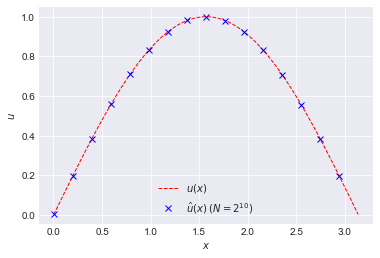

In [4]:
plt.style.use("seaborn-dark") 
fig = plt.figure()
plt.plot(x, u_ex, color = "r", linewidth = 1.0, linestyle = 'dashed', label = r"$u(x)$")
plt.plot(x, u_hat, color = "b",marker = "x", markevery = 64, linewidth = 0.0, label = r"$\hat{u}(x) \; (N = 2^{10})$")
plt.xlabel(r"$x$")
plt.ylabel(r"$u$")
plt.grid()
plt.legend()
plt.savefig("./figure/dst_ode_solution.pdf")
plt.show()